In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [118]:
df = pd.read_csv(r'E:\DL\heart risk level prediction with linear regression\cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [119]:
dataset = df.values
data = dataset[:,0:7]
data

array([[  1.,  48., 236., ...,   0.,   1.,   0.],
       [  0.,  48., 260., ...,   0.,   1.,   1.],
       [  0.,  44., 187., ...,   1.,   1.,   0.],
       ...,
       [  0.,  65., 212., ...,   1.,   0.,   0.],
       [  0.,  66., 184., ...,   0.,   0.,   0.],
       [  1.,  45., 203., ...,   0.,   1.,   0.]])

In [120]:
target = dataset[:,7]
target

array([ 1.1,  7. ,  7. , ..., 30.6, 23.8,  1. ])

In [121]:
target = np.reshape(target, (-1,1))
print(target.shape)
print(target)

(6644, 1)
[[ 1.1]
 [ 7. ]
 [ 7. ]
 ...
 [30.6]
 [23.8]
 [ 1. ]]


# scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)

# building model

In [131]:
model = Sequential()
model.add(Dense(128, input_dim=7, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               1024      
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 10)                650       
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-train

In [132]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = "C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models/model-{epoch:03d}.model"

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss',save_best_only=True,mode='auto')

# test train split and trainning

In [133]:
from sklearn.model_selection import train_test_split
train_data, test_data,  train_target, test_target = train_test_split(data_scaled,target_scaled,test_size=0.2) 

history = model.fit(train_data, train_target, epochs=190, validation_data=(test_data, test_target), callbacks=[checkpoint])

Epoch 1/190
163/167 [============================>.] - ETA: 0s - loss: 0.0111 - mse: 0.0111

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-001.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-001.model\assets


167/167 [==============================] - 15s 56ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4/190
166/167 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-004.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-004.model\assets


167/167 [==============================] - 8s 49ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/190
162/167 [============================>.] - ETA: 0s - loss: 0.0068 - mse: 0.0068

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-005.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-005.model\assets


167/167 [==============================] - 7s 44ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 6/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 7/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 10/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 11/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 12/190
167/167 [==============================] - 2s 11ms/step - l

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-014.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-014.model\assets


167/167 [==============================] - 6s 36ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 15/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 16/190
164/167 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-016.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-016.model\assets


167/167 [==============================] - 6s 37ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 17/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 18/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 19/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 20/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 21/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 22/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 23/190
167/167 [==============================] - 2s 12ms/step

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-028.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-028.model\assets


167/167 [==============================] - 6s 39ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 29/190
167/167 [==============================] - 2s 14ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 30/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 31/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 32/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 33/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 34/190
167/167 [==============================] - 2s 14ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 35/190
167/167 [==============================] - 2s 11ms/step

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-046.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-046.model\assets


167/167 [==============================] - 6s 37ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 47/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 48/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 49/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 50/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 51/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 52/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 53/190
167/167 [==============================] - 2s 11ms/step

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-059.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-059.model\assets


167/167 [==============================] - 7s 41ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 60/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 61/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 62/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 63/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 64/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 65/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 66/190
167/167 [==============================] - 2s 11ms/step

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-090.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-090.model\assets


167/167 [==============================] - 7s 43ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 91/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 92/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 93/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 94/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 95/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 96/190
167/167 [==============================] - 2s 15ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 97/190
165/167 [============================>.] - ETA: 0s - lo

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-097.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-097.model\assets


167/167 [==============================] - 7s 43ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 98/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 99/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 100/190
167/167 [==============================] - 2s 10ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 101/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 102/190
167/167 [==============================] - 2s 14ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 103/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 104/190
167/167 [==============================] - 2s 13ms

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-108.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-108.model\assets


167/167 [==============================] - 6s 39ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 109/190
167/167 [==============================] - 3s 21ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 110/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 111/190
167/167 [==============================] - 2s 15ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 112/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 113/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 114/190
167/167 [==============================] - 2s 13ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 115/190
167/167 [==============================] - 2s 13

167/167 [==============================] - 4s 24ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 169/190
167/167 [==============================] - 3s 18ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 170/190
167/167 [==============================] - 4s 21ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 171/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 172/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 173/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 174/190
165/167 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046

INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-174.model\assets


INFO:tensorflow:Assets written to: C:/Users/WickyLee/flask_intro/Heart_disease_prediction/models\model-174.model\assets


167/167 [==============================] - 6s 38ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 175/190
167/167 [==============================] - 3s 19ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 176/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 177/190
167/167 [==============================] - 2s 11ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 178/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 179/190
167/167 [==============================] - 3s 15ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 180/190
167/167 [==============================] - 2s 12ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 181/190
167/167 [==============================] - 2s 14

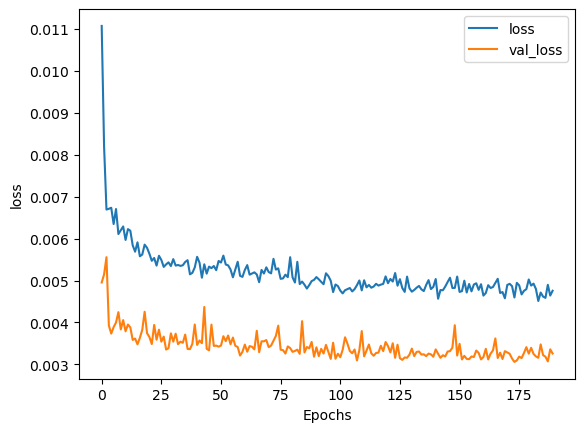

In [134]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

# R2 score

In [135]:
from sklearn.metrics import r2_score

predicted_results = model.predict(test_data)

r2 = r2_score(test_target, predicted_results)
print('R2 Score: ',r2)

42/42 [==============================] - 1s 6ms/step
R2 Score:  0.8592318546954872


In [128]:
print('actual: ', test_target[:10].T)
print('predicted', predicted_results[:10].T)

actual:  [[0.01172333 0.52754982 0.010551   0.12895662 0.09495897 0.04806565
  0.01289566 0.27198124 0.08089097 0.11606096]]
predicted [[0.03677375 0.5043775  0.03181085 0.13047111 0.14369683 0.10899646
  0.04232033 0.2705662  0.10798727 0.10350022]]


# inverse_transform

In [129]:
print('Actual inverse_transform: ',scaler_target.inverse_transform(test_target[:10]).T)
print('Predicted_inverse_transform: ',scaler_target.inverse_transform(predicted_results[0:10]).T)

Actual inverse_transform:  [[ 1.1 45.1  1.  11.1  8.2  4.2  1.2 23.3  7.  10. ]]
Predicted_inverse_transform:  [[ 3.236801  43.123398   2.8134656 11.229186  12.35734    9.397398
   3.709924  23.179296   9.311315   8.928569 ]]


# getting predictions

In [130]:
my_test_data = [0,28,3.5,51,0,0,0]
my_test_data = scaler_data.transform([my_test_data])

result = model.predict(my_test_data)
print('result: ',result)

predicted_value = scaler_target.inverse_transform(result)

print('Predicted: ',predicted_value)

1/1 [==============================] - 0s 188ms/step
result:  [[0.01253638]]
Predicted:  [[1.1693536]]


# Saving scaler models

In [137]:
import joblib
joblib.dump(scaler_data, r'C:\Users\WickyLee\flask_intro\Heart_disease_prediction\models\scaler_data.sav')
joblib.dump(scaler_target, r'C:\Users\WickyLee\flask_intro\Heart_disease_prediction\models\scaler_target.sav')

['C:\\Users\\WickyLee\\flask_intro\\Heart_disease_prediction\\models\\scaler_target.sav']